## 1. Import Libraries


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## 2. Load Dataset 

In [5]:
df = pd.read_csv("../data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3.  Data Exploration (EDA)

In [6]:
df.shape        # number of rows & columns
df.info()       # column datatypes + null values
df.describe()   # summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/var/folders/1y/pn9x7lqd0vj4j9d589w2jl1r0000gn/T/ipykernel_10617/1172674212.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df,palette="pastel")


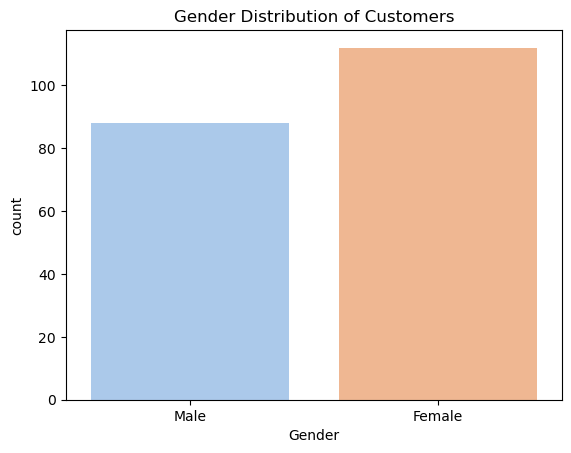

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64

In [7]:
sns.countplot(x="Gender", data=df,palette="pastel")
plt.title("Gender Distribution of Customers")
plt.show()
df["Gender"].value_counts(normalize=True) * 100

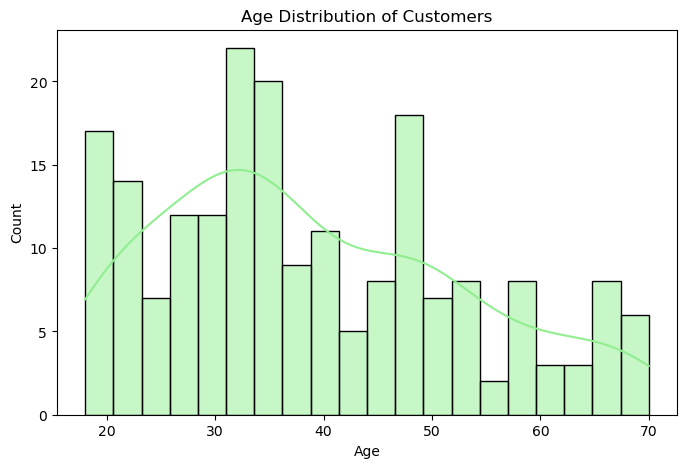

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="lightgreen")
plt.title("Age Distribution of Customers")
plt.show()

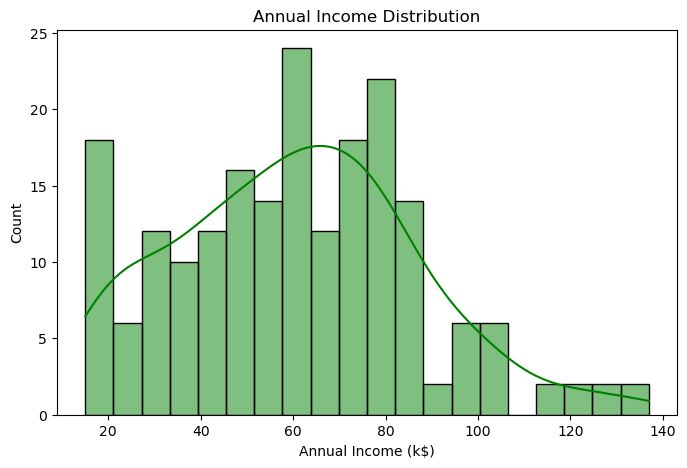

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="green")
plt.title("Annual Income Distribution")
plt.show()

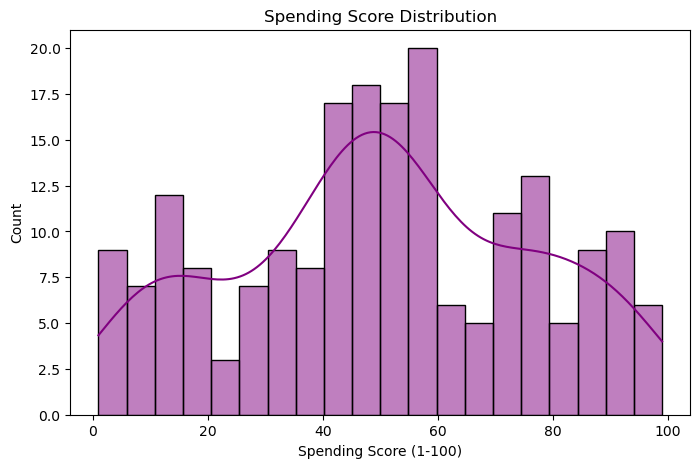

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="purple")
plt.title("Spending Score Distribution")
plt.show()

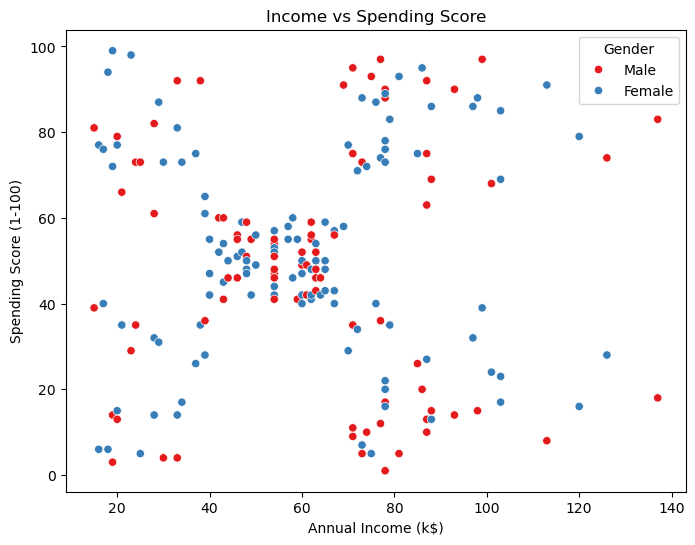

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Gender",
    data=df,
    palette="Set1",
)
plt.title("Income vs Spending Score")
plt.show()

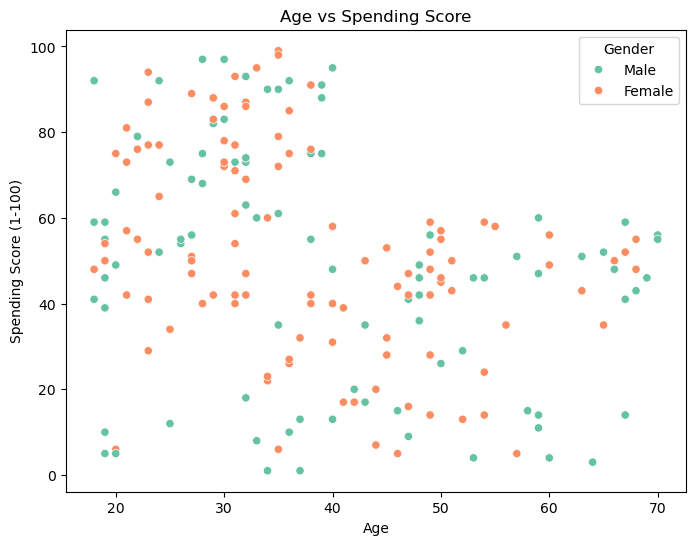

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Age", 
    y="Spending Score (1-100)", 
    data=df, 
    hue="Gender", 
    palette="Set2"
)
plt.title("Age vs Spending Score")
plt.show()

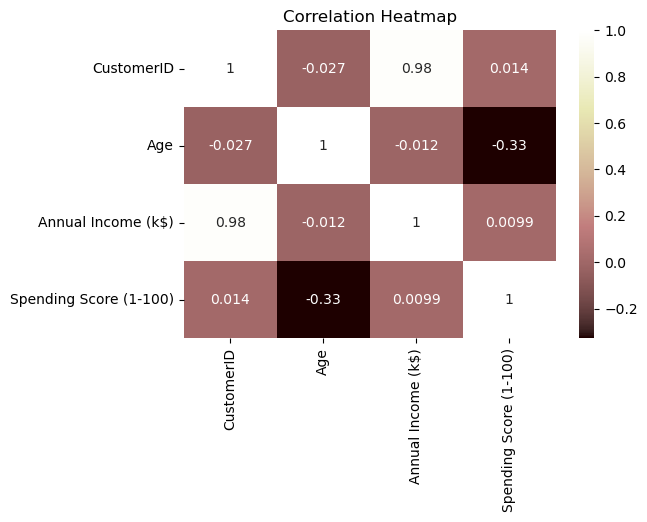

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="pink")
plt.title("Correlation Heatmap")
plt.show()

## 4. Data Preprocessing

In [18]:
df = df.drop('CustomerID',axis=1)

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [20]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Choosing Optimal K 

#### Elbow Method

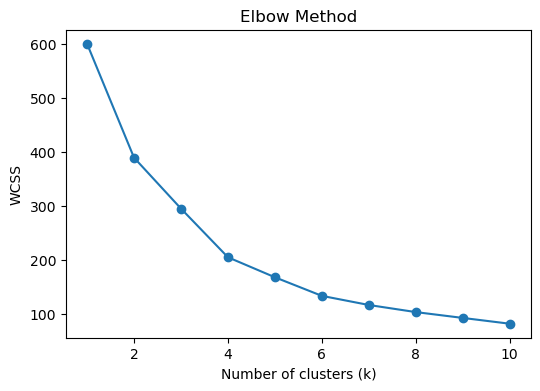

In [24]:
# Elbow Method (WCSS)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

Above plot :
->Before 4, WCSS decreases rapidly (meaning adding clusters improves grouping a lot).
->After 4, WCSS decreases slowly → diminishing returns.

Optimal number of Cluster = 4


In [25]:
# Silhouette Score
print("\nSilhouette Scores for different k values:")
for k in range(2, 11):   # silhouette needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k = {k}, Silhouette Score = {score:.3f}")


Silhouette Scores for different k values:
k = 2, Silhouette Score = 0.335
k = 3, Silhouette Score = 0.358
k = 4, Silhouette Score = 0.404
k = 5, Silhouette Score = 0.417
k = 6, Silhouette Score = 0.428
k = 7, Silhouette Score = 0.417
k = 8, Silhouette Score = 0.408
k = 9, Silhouette Score = 0.418
k = 10, Silhouette Score = 0.407
